1.Pytanie: czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

Filtruje, grupuje dane :zostawiam tylko kolumny kluczowe do analizy

In [111]:
import pandas as pd

hr_data = pd.read_csv(r"HRDataset (3).csv")

filtered_data = hr_data[['ManagerName', 'ManagerID', 'PerformanceScore']]
filtered_data_cleaned = filtered_data.dropna()

missing_values = filtered_data_cleaned.isnull().sum()
print("Liczba brakujących wartości w każdej kolumnie:\n", missing_values)

print("\nDane po usunięciu braków:\n", filtered_data_cleaned.head())

print("Liczba wierszy po usunięciu braków:", len(filtered_data_cleaned))

Liczba brakujących wartości w każdej kolumnie:
 ManagerName         0
ManagerID           0
PerformanceScore    0
dtype: int64

Dane po usunięciu braków:
           ManagerName  ManagerID PerformanceScore
0  Brandon R. LeBlanc        1.0      Fully Meets
1  Brandon R. LeBlanc        1.0      Fully Meets
2  Brandon R. LeBlanc        1.0      Fully Meets
3  Brandon R. LeBlanc        1.0      Fully Meets
4  Brandon R. LeBlanc        1.0      Fully Meets
Liczba wierszy po usunięciu braków: 302


Obliczam średnią ocenę wydajności (PerformanceScore) dla każdego menedżera.

In [113]:
performance_mapping = {
    'Exceeds': 4,
    'Fully Meets': 3,
    'Needs Improvement': 2,
    'PIP': 1
}
hr_data['PerformanceScoreNumeric'] = hr_data['PerformanceScore'].map(performance_mapping)

filtered_data_cleaned = hr_data[['ManagerName', 'ManagerID', 'PerformanceScoreNumeric']].dropna()

average_performance_by_manager = filtered_data_cleaned.groupby('ManagerName')['PerformanceScoreNumeric'].mean().reset_index()

print("Średnia ocena wydajności dla każdego menedżera:")
print(average_performance_by_manager)


Średnia ocena wydajności dla każdego menedżera:
           ManagerName  PerformanceScoreNumeric
0      Alex Sweetwater                 3.111111
1             Amy Dunn                 2.904762
2   Board of Directors                 3.000000
3   Brandon R. LeBlanc                 3.000000
4       Brannon Miller                 2.904762
5     Brian Champaigne                 3.000000
6        David Stanley                 3.000000
7       Debra Houlihan                 2.666667
8         Elijiah Gray                 3.000000
9         Eric Dougall                 3.250000
10          Janet King                 3.105263
11     Jennifer Zamora                 3.142857
12          John Smith                 2.714286
13       Kelley Spirea                 3.090909
14       Ketsia Liebig                 3.047619
15      Kissy Sullivan                 2.954545
16       Lynn Daneault                 3.000000
17      Michael Albert                 2.863636
18        Peter Monroe                 2

        Wniosek: wartości te są zbliżone, oscylując wokół 3.0, co sugeruje ogólnie podobny poziom ocen wydajności niezależnie od menedżera. Jednak drobne różnice, jak wyższe średnie u Erica Dougalla (3.25) czy niższe u Debry Houlihan (2.67), mogą wskazywać na niewielkie odchylenia w sposobie oceny pracowników przez różnych przełożonych.

 Rysuje wykres pudełkowy, aby zobaczyć rozkład ocen wydajności w zależności od menedżera.

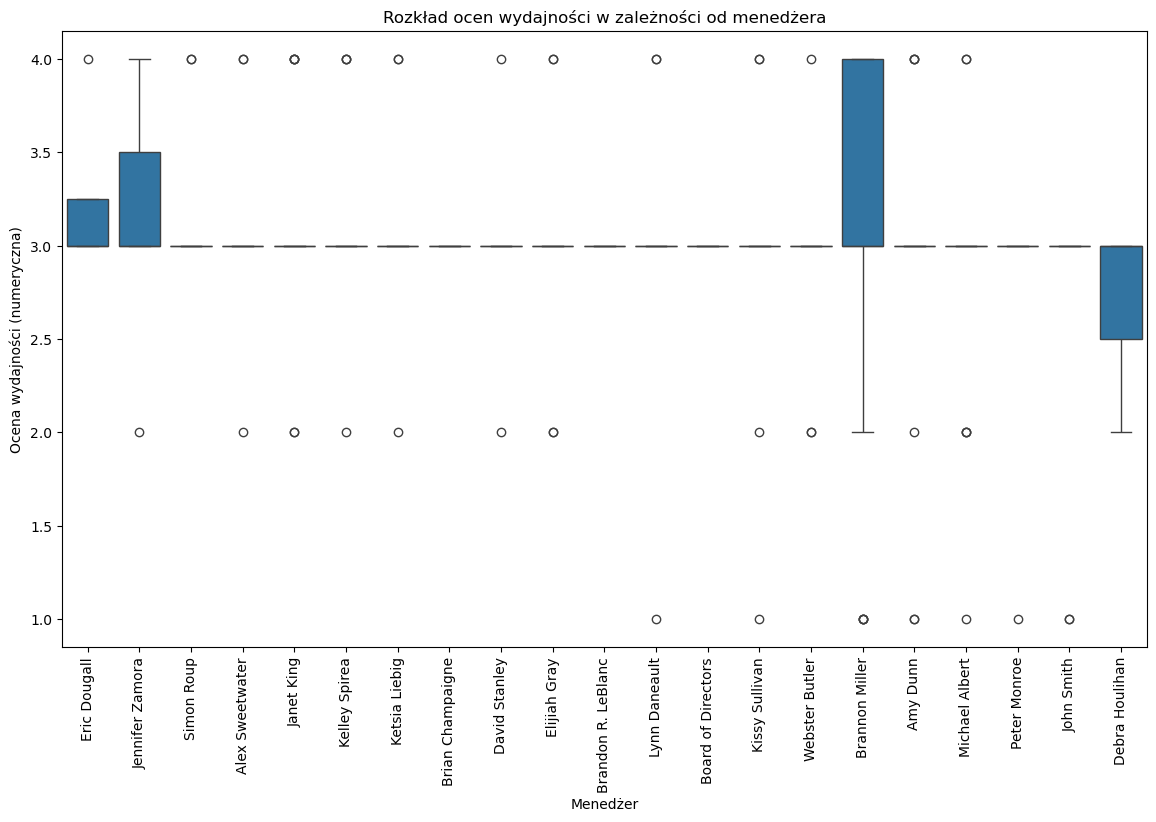

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(
    x='ManagerName',
    y='PerformanceScoreNumeric',
    data=filtered_data_cleaned,
    order=filtered_data_cleaned.groupby('ManagerName')['PerformanceScoreNumeric'].mean().sort_values(ascending=False).index
)
plt.xticks(rotation=90) 
plt.title("Rozkład ocen wydajności w zależności od menedżera")
plt.ylabel("Ocena wydajności (numeryczna)")
plt.xlabel("Menedżer")
plt.show()

     Wnioski:1)Dla większości menedżerów mediana ocen wynosi około 3.0, co odpowiada ocenie „Fully Meets”. Jest to poziom, na którym oceny są stosunkowo spójne.2)Menedżerowie tacy jak Amy Dunn i Debra Houlihan wykazują większą zmienność w ocenach, co widoczne jest poprzez dłuższe pudełka (między Q1 a Q3) i szerszy zakres.3)Menedżer Eric Dougall ma najwyższe mediany ocen oraz kilka wartości maksymalnych na poziomie 4 („Exceeds”), co sugeruje, że jego pracownicy otrzymują lepsze oceny.4)Z kolei Debra Houlihan oraz Amy Dunn mają kilka ocen poniżej poziomu 3, w tym również wartości odstające (outliers) w dolnych zakresach, co może wskazywać na problemy z wydajnością niektórych pracowników.

 Rysuje wykres słupkowy pokazujący średnie oceny wydajności dla każdego menedżera.

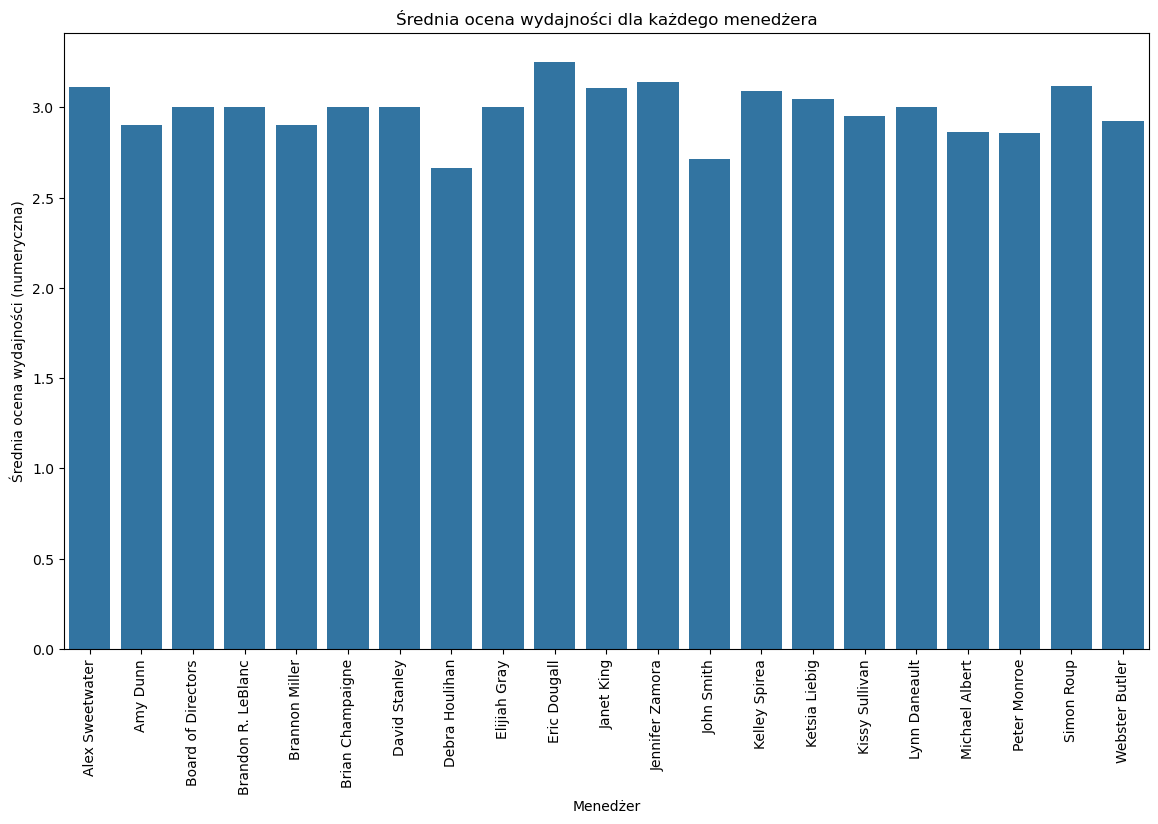

In [54]:
plt.figure(figsize=(14, 8))
sns.barplot(x='ManagerName', y='PerformanceScoreNumeric', data=average_performance_by_manager)
plt.xticks(rotation=90)  
plt.title("Średnia ocena wydajności dla każdego menedżera")
plt.ylabel("Średnia ocena wydajności (numeryczna)")
plt.xlabel("Menedżer")
plt.show()

    Wnioski: większość menedżerów przyznaje oceny bliskie wartości 3, co wskazuje na jednolitą tendencję oceny wydajności. Menedżerowie, tacy jak Eric Dougall z wyższą średnią oceną oraz Debra Houlihan z niższą, wyróżniają się na tle innych, co może sugerować bardziej wymagające lub łagodniejsze podejście do oceny pracowników.

                Odp 1. Na podstawie wykonanych analiz, możemy wyciągnąć wstępne wnioski dotyczące zależności między menadżerem a oceną wydajności :1)Średnie oceny: Wykres słupkowy średnich ocen wydajności dla poszczególnych menedżerów pokazuje, że większość menedżerów ocenia swoich pracowników na podobnym poziomie, z wartościami oscylującymi wokół 3 ("Fully Meets"). Sugeruje to, że ogólnie oceny są spójne, niezależnie od menedżera.2)Odchylenia od średniej: Jednak niektórzy menedżerowie, tacy jak Eric Dougall (wyższe oceny) i Debra Houlihan (niższe oceny), mają średnie różniące się od reszty, co może sugerować pewne różnice w podejściu do oceniania. Różnice te nie są bardzo duże, ale mogą wskazywać na indywidualne style oceniania.3)Brak jednoznacznej zależności: Na podstawie analizy średnich oraz rozkładu ocen wydajności nie można jednoznacznie stwierdzić silnej zależności między przełożonym a oceną wydajności, ponieważ większość menedżerów stosuje podobne kryteria oceniania. Jednak niewielkie różnice wskazują, że indywidualne podejście poszczególnych menedżerów może mieć pewien, choć ograniczony wpływ na oceny.

2.Pytanie:jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [61]:
from datetime import datetime

reference_date = datetime(2019, 9, 27)

def calculate_tenure(row):
    """
    Obliczam staż pracy w latach. Jesli pracownik nadal pracuje,
    stosuję datę 2019-09-27.
    """
    if pd.isnull(row['DateofTermination']):  
        end_date = reference_date
    else:
        end_date = row['DateofTermination']
    return (end_date - row['DateofHire']).days / 365  
    
hr_data['DateofHire'] = pd.to_datetime(hr_data['DateofHire'], errors='coerce')
hr_data['DateofTermination'] = pd.to_datetime(hr_data['DateofTermination'], errors='coerce')

hr_data['Tenure'] = hr_data.apply(calculate_tenure, axis=1)

tenure_summary = hr_data.groupby('RecruitmentSource').agg(
    AvgTenure=('Tenure', 'mean'),
    NumEmployees=('Tenure', 'count')
).reset_index()

tenure_summary = tenure_summary.sort_values(by=['AvgTenure', 'NumEmployees'], ascending=[False, False])

print("Średni staż pracy oraz liczba pracowników dla każdego źródła rekrutacji:")
print(tenure_summary)

Średni staż pracy oraz liczba pracowników dla każdego źródła rekrutacji:
                         RecruitmentSource  AvgTenure  NumEmployees
1                            Careerbuilder   8.487671             1
14                                   Other   6.457534             9
0                                Billboard   5.866781            16
9                                 MBTA ads   5.733441            17
21                      Website Banner Ads   5.725395            13
7                      Information Session   5.627397             4
17                    Professional Society   5.441370            20
4                        Employee Referral   5.029342            31
16                  Pay Per Click - Google   5.012785            21
12                    On-campus Recruiting   5.009817            12
10                             Monster.com   4.838128            24
8                          Internet Search   4.714612             6
11                      Newspager/Magazine 

        Wnioski: Źródła rekrutacji mają istotny wpływ na średni staż pracowników. Najwyższy średni staż osiąga źródło "Careerbuilder" (8,49 lat), jednak reprezentuje tylko jednego pracownika, co ogranicza jego znaczenie. Bardziej reprezentatywnymi źródłami są "Billboard" (5,87 lat, 16 pracowników) oraz "MBTA ads" (5,73 lat, 17 pracowników), które generują pracowników o długim stażu przy większej liczbie zatrudnionych. 

Wyznaczam wykres punktowy, pokazujący zależność między liczbą pracowników a średnim stażem pracy, uwzględniając różne źródła rekrutacji.       

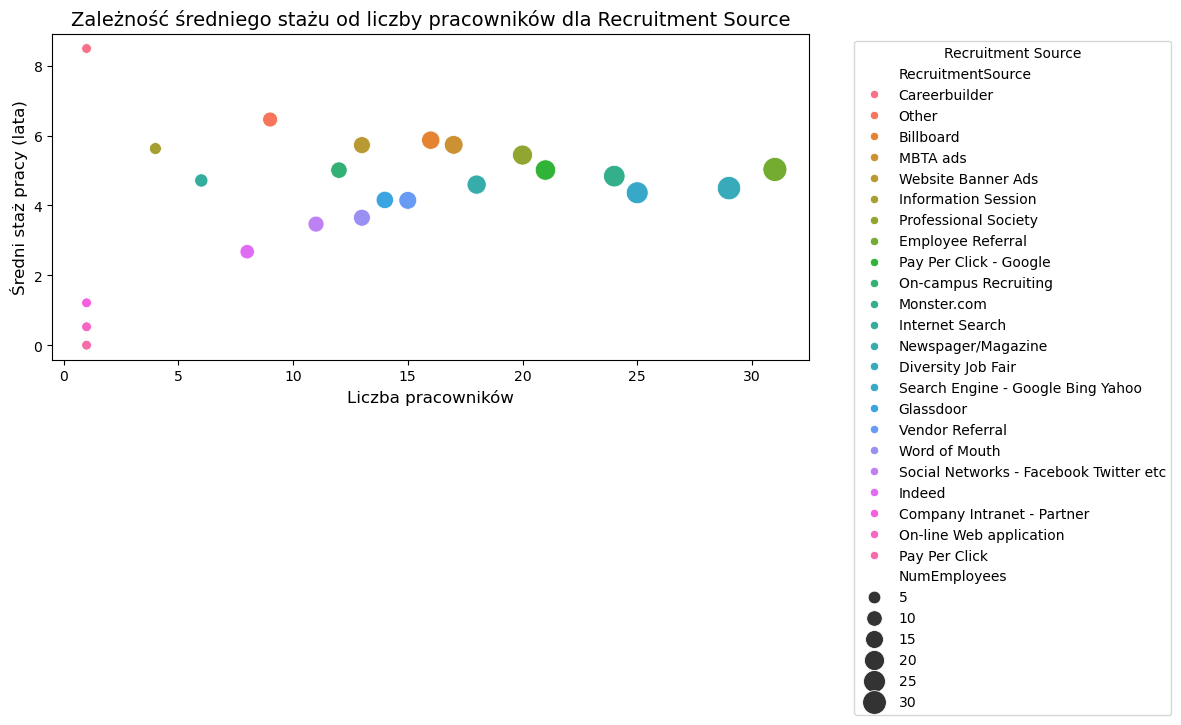

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='NumEmployees', 
    y='AvgTenure', 
    hue='RecruitmentSource', 
    size='NumEmployees', 
    sizes=(50, 300), 
    data=tenure_summary
)
plt.title('Zależność średniego stażu od liczby pracowników dla Recruitment Source', fontsize=14)
plt.xlabel('Liczba pracowników', fontsize=12)
plt.ylabel('Średni staż pracy (lata)', fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Recruitment Source')
plt.tight_layout()
plt.show()

        Odp 2. Na podstawie przedstawionych danych i analizy, najlepszym źródłem rekrutacji, jeśli zależy nam na jak najdłuższym stażu pracowników, jest Billboard. Osiąga ono średni staż pracy wynoszący 5,87 lat przy 16 zatrudnionych osobach, co czyni je zarówno efektywnym, jak i reprezentatywnym źródłem. Dodatkowo, MBTA ads (5,73 lat, 17 osób) i Other (6,46 lat, 9 osób) są również godne uwagi, oferując dobrą równowagę między długością stażu a liczbą zatrudnionych. Natomiast "Careerbuilder", choć ma najwyższy staż (8,49 lat), nie jest reprezentatywne ze względu na zatrudnienie tylko jednej osoby.

3. Pytanie: czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

Wyznaczam Heatmape, która pokaże średnie zadowolenie z pracy dla różnych stanów cywilnych w postaci kolorowych wartości.

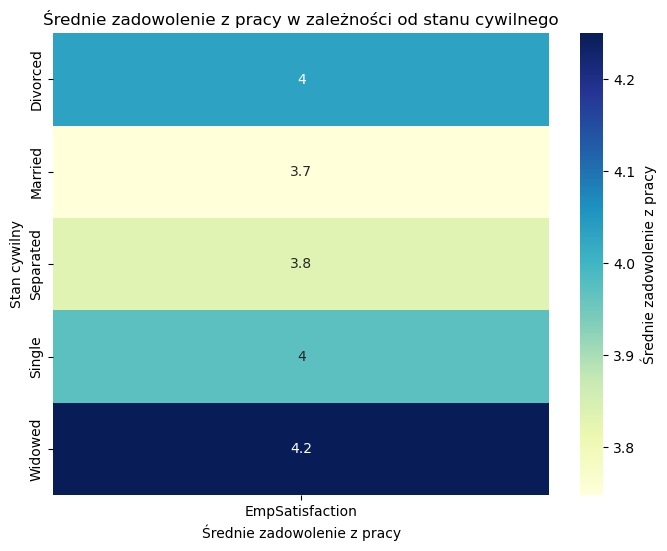

In [22]:
filtered_data = hr_data[['MaritalDesc', 'EmpSatisfaction']].dropna()

average_satisfaction_by_marital = filtered_data.groupby('MaritalDesc')['EmpSatisfaction'].mean().reset_index()

heatmap_data = average_satisfaction_by_marital.set_index('MaritalDesc')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Średnie zadowolenie z pracy'})
plt.title("Średnie zadowolenie z pracy w zależności od stanu cywilnego")
plt.xlabel("Średnie zadowolenie z pracy")
plt.ylabel("Stan cywilny")
plt.show()


    Wnioski : Wykres pokazuje, że najwyższe średnie zadowolenie z pracy mają osoby owdowiałe (4.2) oraz osoby samotne i rozwiedzione (4.0), co może sugerować większą satysfakcję z pracy w tych grupach. Osoby pozostające w związku małżeńskim mają najniższe średnie zadowolenie (3.7), co wskazuje na możliwy związek między stanem cywilnym a satysfakcją z pracy.

        Odp.3.Na podstawie analizy średnich poziomów zadowolenia z pracy w zależności od stanu cywilnego możemy stwierdzić, że istnieją pewne różnice, co może sugerować słabą korelację między stanem cywilnym a zadowoleniem z pracy. Grupy takie jak osoby owdowiałe, samotne i rozwiedzione wykazują wyższe średnie zadowolenie z pracy, podczas gdy osoby zamężne/żonate mają najniższy poziom zadowolenia, co wskazuje na możliwe różnice w odczuwanej satysfakcji w zależności od sytuacji życiowej.

4.Pytanie: jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

Rysuje Violin plot, który oprócz rozkładu i wartości odstających pokazuje także kształt rozkładu, co może lepiej zobrazować ogólną strukturę wieku

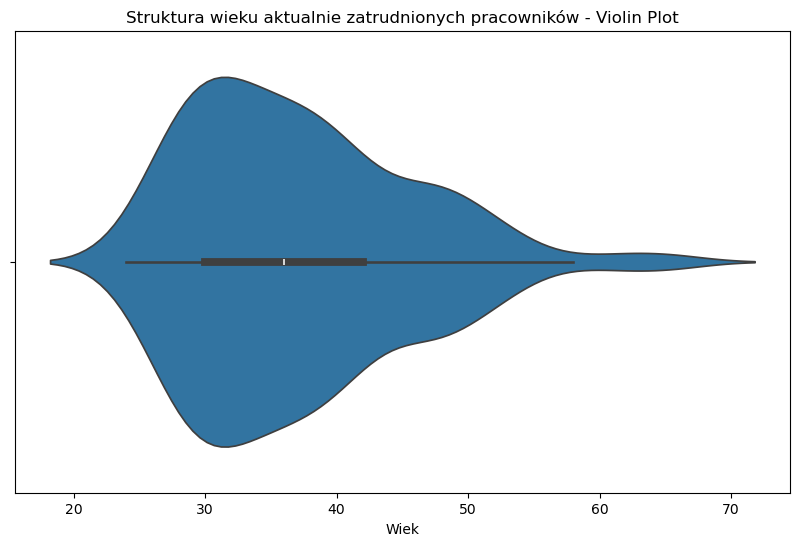

In [30]:
import numpy as np  
hr_data['DOB'] = pd.to_datetime(hr_data['DOB'], format='%m/%d/%y', errors='coerce')

hr_data['DateofHire'] = pd.to_datetime(hr_data['DateofHire'], errors='coerce')
reference_date = hr_data['DateofHire'].max()

reference_year = reference_date.year
hr_data['DOB'] = np.where(hr_data['DOB'].dt.year > reference_year, 
                          hr_data['DOB'] - pd.DateOffset(years=100), 
                          hr_data['DOB'])

hr_data['Age'] = hr_data['DOB'].apply(lambda x: (reference_date - x).days // 365 if pd.notnull(x) else None)
current_employees = hr_data[hr_data['DateofTermination'].isna()]

plt.figure(figsize=(10, 6))
sns.violinplot(x=current_employees['Age'])
plt.title("Struktura wieku aktualnie zatrudnionych pracowników - Violin Plot")
plt.xlabel("Wiek")
plt.show()

    Wnioski:  rozkład pokazuje, że większość pracowników mieści się w przedziale wieku od około 30 do 60 lat, z najwyższą koncentracją pomiędzy 40 a 50 lat.

        Odp4.Struktura wieku aktualnie zatrudnionych pracowników jest skoncentrowana głównie w przedziale od około 40 do 50 lat, co sugeruje, że większość pracowników znajduje się w średnim wieku. Mniejsza liczba pracowników jest młodsza niż 30 lat lub starsza niż 60 lat, co wskazuje na ograniczoną reprezentację zarówno młodszych, jak i starszych grup wiekowych wśród zatrudnionych. 

5.Pytanie: czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

Rysuje wykres regresji liniowej, który pozwoli zobaczyć czy istnieje trend, który wskazuje na korelację między wiekiem a liczbą specjalnych projektów

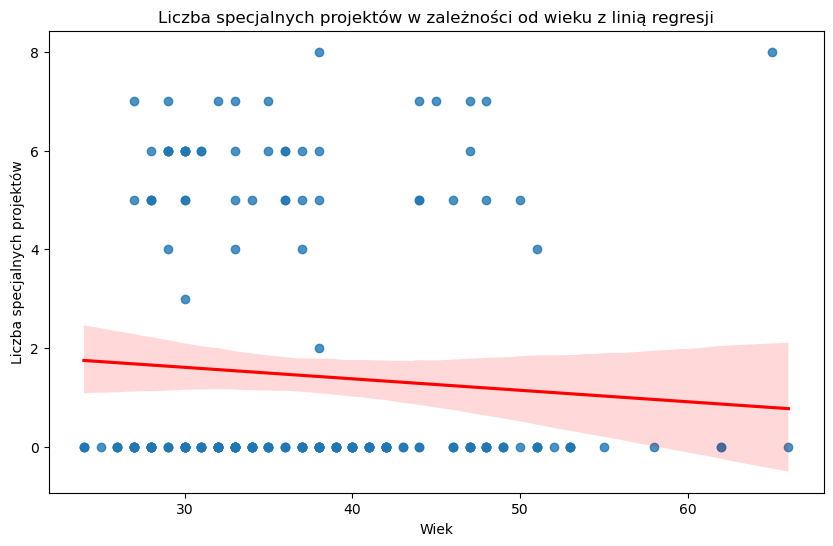

In [32]:
hr_data['DOB'] = pd.to_datetime(hr_data['DOB'], format='%m/%d/%y', errors='coerce')

hr_data['DateofHire'] = pd.to_datetime(hr_data['DateofHire'], errors='coerce')
reference_date = hr_data['DateofHire'].max()

reference_year = reference_date.year
hr_data['DOB'] = np.where(hr_data['DOB'].dt.year > reference_year, 
                          hr_data['DOB'] - pd.DateOffset(years=100), 
                          hr_data['DOB'])

hr_data['Age'] = hr_data['DOB'].apply(lambda x: (reference_date - x).days // 365 if pd.notnull(x) else None)

current_employees = hr_data[hr_data['DateofTermination'].isna()]

plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='SpecialProjectsCount', data=current_employees, ci=95, line_kws={"color": "red"})
plt.title("Liczba specjalnych projektów w zależności od wieku z linią regresji")
plt.xlabel("Wiek")
plt.ylabel("Liczba specjalnych projektów")
plt.show()

    Wnioski: linia trendu jest lekko nachylona w dół, co sugeruje bardzo słabą, negatywną korelację między wiekiem a liczbą specjalnych projektów. Oznacza to, że starsi pracownicy mają tendencję do pracy nad nieco mniejszą liczbą specjalnych projektów niż młodsi pracownicy, chociaż zależność ta jest niewielka i może nie być istotna statystycznie.

        Odp.5.Na podstawie analizy regresji liniowej i wykresu możemy stwierdzić, że starsi pracownicy nie pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy. W rzeczywistości, wykres pokazuje bardzo słabą, negatywną korelację, co sugeruje, że starsi pracownicy mogą pracować nad nieco mniejszą liczbą projektów specjalnych, choć ta zależność jest minimalna i prawdopodobnie nie jest statystycznie istotna.